In [69]:
# Q1

import pandas as pd
import numpy as np

#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split, cross_val_score

from scipy.stats import linregress

import matplotlib.pyplot as plt

scores = pd.read_csv("Dataset student_score.csv")

#x = scores.drop("Yi", axis='columns') #axis 1 or columns
x = scores["Xi"] #test score
y = scores["Yi"] #stats grade

reg = linregress(x,y) #try to fit the data to the linear regression, see how Yi (total stats grade) is affected by the other paramenters
print("Equation is: y = {}x + {}".format(round(reg.slope, 3), round(reg.intercept, 3)))

predict_x = 80
print("If student got 80 on the test, the regression predicts final grade {}".format(round(reg.intercept + reg.slope*predict_x, 2)))
#in dataset, student with 80 got a 70
print()
print("We can see that the regression does not fit the data well as the prediction for 80 is 78.29; but in the actual dataset, the student that scored 80 got a final grade of 70")

#fitting the data is getting the line close to the ACTUAL data points, in general we dont want to overfit the data

Equation is: y = 0.644x + 26.781
If student got 80 on the test, the regression predicts final grade 78.29

We can see that the regression does not fit the data well as the prediction for 80 is 78.29; but in the actual dataset, the student that scored 80 got a final grade of 70


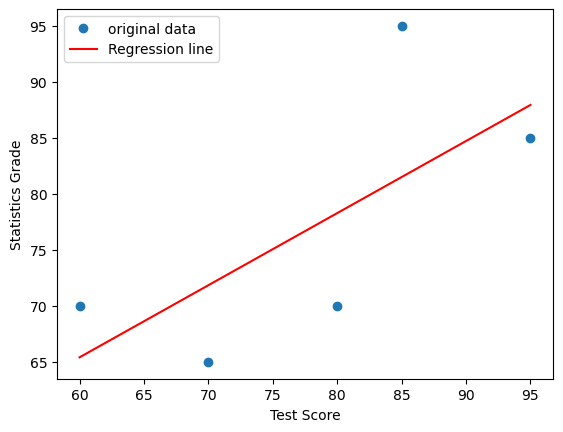

In [50]:
# Q2

import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='original data') #'o' indicates scatter
plt.plot(x, reg.intercept + reg.slope*x, 'r', label='Regression line')
plt.xlabel("Test Score")
plt.ylabel("Statistics Grade")
plt.legend()
plt.show()

In [44]:
# Q3

print("R-squared value for the regression: {}".format(round(reg.rvalue**2, 5)))
print("The R-squared value is also not very close to 1, indicating that the regression model is not that good of a fit for the data")

R-squared value for the regression: 0.48032
The R-squared value is also not very close to 1, indicating that the regression model is not that good of a fit for the data


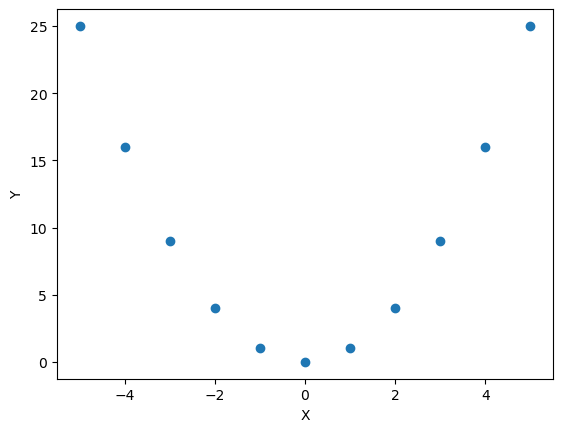

The scatterplot of the data indicates that it is a non-linear regression model (i.e curved). In particular, it seems polynomial (quadratic).


In [79]:
# Q4

import matplotlib.pyplot as plt

X = [-4,-2,1,3,-1,-5,4,2,0,-3,5]
Y = [16,4,1,9,1,25,16,4,0,9,25]

plt.plot(X, Y, 'o', label="data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

print("The scatterplot of the data indicates that it is a non-linear regression model (i.e curved). In particular, it seems polynomial (quadratic).")

In [5]:
# Q5

import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

disease = pd.read_csv("Dataset heart-disease-dataset.csv")
disease = disease.apply(pd.to_numeric, errors='coerce') #convert all string to NaN ('?' entries)
disease = disease.dropna(how="any", axis=0) #axis 0 or 'index' for rows, drop all rows with NaN

#print(disease.head())
#print(disease.columns)

X = disease.drop("result", axis="columns") #our independant variables
Y = disease["result"]
#print(X)
#print(Y)

#do 80-20 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

#print(X_train, Y_train)
#print(X_test, Y_test)

lr = linear_model.LinearRegression()

lr.fit(X_train, Y_train) 

Y_prediction = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_prediction) 
r = lr.score(X_test, Y_test) #calculate r-squared, how good is the fit 

print("Linear regression model performance:")
print()
print("Mean Square Error = {}".format(round(mse, 3)))
print("R-squared = {}".format(round(r, 3)))

Linear regression model performance:

Mean Square Error = 0.574
R-squared = 0.523


In [6]:
disease = pd.read_csv("Dataset heart-disease-dataset.csv")
disease = disease.apply(pd.to_numeric, errors='coerce') #convert all string to NaN ('?' entries)
disease = disease.dropna(how="any", axis=0) #axis 0 or 'index' for rows, drop all rows with NaN

X2 = disease.drop("result", axis="columns") #our independant variables
Y2 = disease["result"]

#do 80-20 train-test split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state=5)

lr2 = linear_model.LogisticRegression(max_iter=10000)

lr2.fit(X_train2, Y_train2)

Y_prediction2 = lr2.predict(X_test2)

mse = mean_squared_error(Y_test2, Y_prediction2) 
r = lr2.score(X_test2, Y_test2) #calculate r-squared, how good is the fit 

print("Logistic regression model performance:")
print()
print("Mean Square Error = {}".format(round(mse, 3)))
print("R-squared = {}".format(round(r, 3)))

Logistic regression model performance:

Mean Square Error = 0.95
R-squared = 0.683


In [7]:
print("The logistic model is better as it has a larger R-squared value for the testing data, meaning that the resulting regression line is a closer fit to the testing data, resulting in better predictions.")

The logistic model is better as it has a larger R-squared value for the testing data, meaning that the resulting regression line is a closer fit to the testing data, resulting in better predictions.
